### Env Config

In [1]:
%%capture
%pip install pandas matplotlib numpy

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_parquet('data/refined/df.parquet')

In [4]:
df = df[df['ct_classificacao'] == 'PJ']

In [5]:
df.dtypes

ct_uf                                      category
ct_tcb                                     category
ct_sr                                      category
ct_cliente                                 category
ct_ocupacao                                category
ct_cnae_secao                              category
ct_cnae_subclasse                          category
ct_porte                                   category
ct_modalidade                              category
ct_origem                                  category
ct_indexador                               category
nu_numero_de_operacoes                        int32
vl_a_vencer_ate_90_dias                     float64
vl_a_vencer_de_91_ate_360_dias              float64
vl_a_vencer_de_361_ate_1080_dias            float64
vl_a_vencer_de_1081_ate_1800_dias           float64
vl_a_vencer_de_1801_ate_5400_dias           float64
vl_a_vencer_acima_de_5400_dias              float64
vl_vencido_acima_de_15_dias                 float64
vl_carteira_

### Análises Joca (Label Temporária)

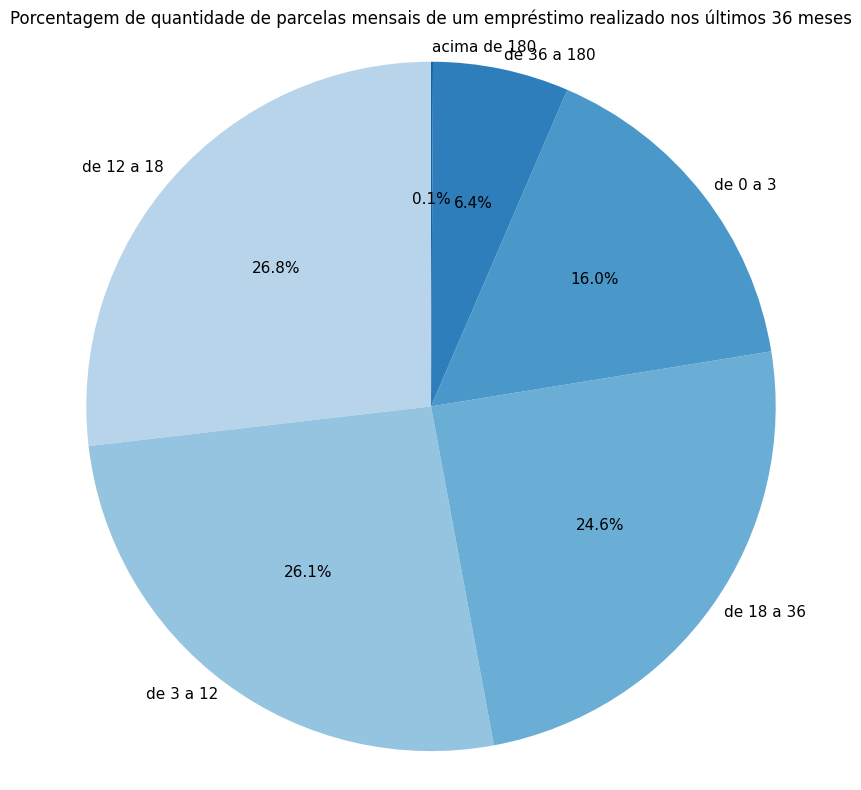

In [6]:
data_atual = datetime.today()
data_limite = data_atual - timedelta(days=36*30)
df_filtered = df[df['dt_data_base'] > pd.to_datetime(data_limite)]

LABELS = {
    '> 180': 'acima de 180',
    '36-180': 'de 36 a 180',
    '18-36': 'de 18 a 36',
    '12-18': 'de 12 a 18',
    '3-12': 'de 3 a 12',
    '0-3': 'de 0 a 3'
}

grouped = df_filtered['ct_faixa_meses_ate_vencimento'].value_counts(normalize=True) * 100
labels_mapeados = [LABELS.get(label, label) for label in grouped.index]

num_colors = len(grouped)
colors = plt.get_cmap('Blues')(np.linspace(0.3, 0.8, num_colors))


plt.figure(figsize=(8, 8))
plt.pie(
    grouped.values,
    labels=labels_mapeados,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    labeldistance=1.04,
    textprops={'fontsize': 11}
)
plt.axis('equal')
plt.title('Porcentagem de quantidade de parcelas mensais de um empréstimo realizado nos últimos 36 meses')
plt.tight_layout()
plt.show()

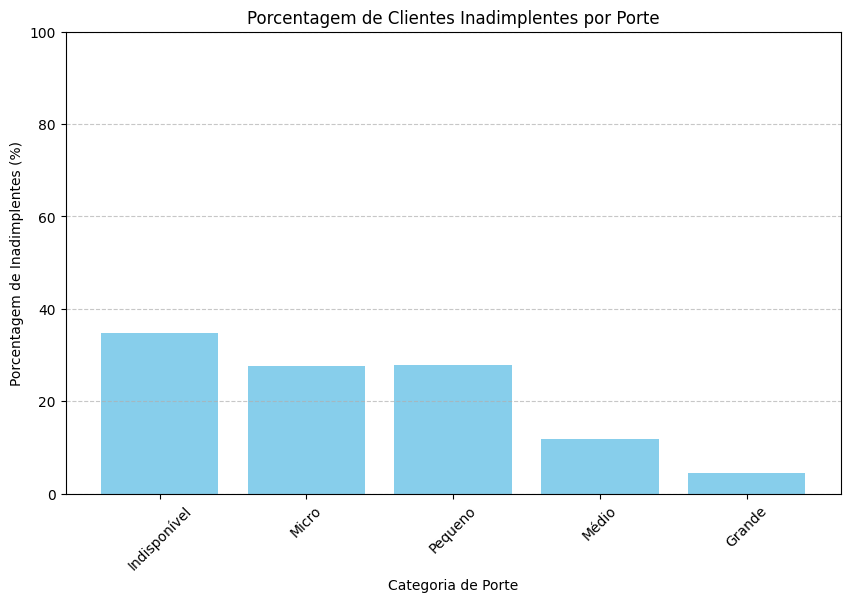

In [7]:
inadimplentes = df[df['vl_carteira_inadimplida_arrastada'] != 0.00]
inadimplentes_por_porte = inadimplentes.groupby('ct_porte').size() / df.groupby('ct_porte').size() * 100

ordem = [
    "Indisponível",
    "Sem rendimento",
    "Micro",
    "Pequeno",
    "Médio",
    "Grande",
    "Até 1 salário mínimo",
    "Mais de 1 a 2 salários mínimos",
    "Mais de 2 a 3 salários mínimos",
    "Mais de 3 a 5 salários mínimos",
    "Mais de 5 a 10 salários mínimos",
    "Mais de 10 a 20 salários mínimos",
    "Acima de 20 salários mínimos"
]

inadimplentes_por_porte = pd.Series(
    inadimplentes_por_porte.values,
    index=inadimplentes_por_porte.index,
    dtype="category"
)

inadimplentes_por_porte = inadimplentes_por_porte.reindex(ordem)

inadimplentes_por_porte = inadimplentes_por_porte.dropna()

plt.figure(figsize=(10, 6))
plt.bar(inadimplentes_por_porte.index, inadimplentes_por_porte.values, color='skyblue')
plt.title('Porcentagem de Clientes Inadimplentes por Porte')
plt.xlabel('Categoria de Porte')
plt.ylabel('Porcentagem de Inadimplentes (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

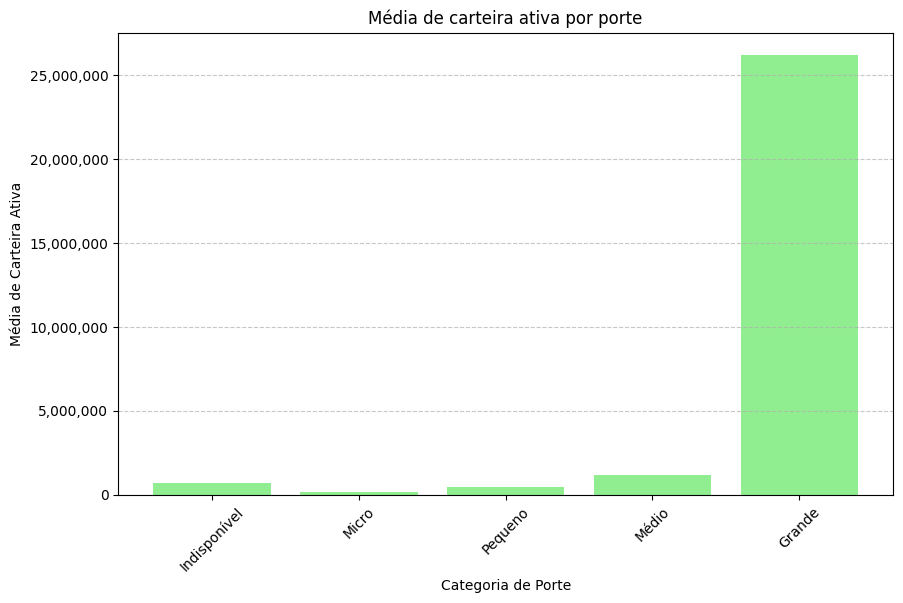

In [8]:
carteira_ativa_por_porte = df.groupby('ct_porte')['vl_carteira_ativa'].mean()

carteira_ativa_por_porte = carteira_ativa_por_porte.reindex(ordem)

carteira_ativa_por_porte = carteira_ativa_por_porte.dropna()

plt.figure(figsize=(10, 6))
plt.bar(carteira_ativa_por_porte.index, carteira_ativa_por_porte.values, color='lightgreen')
plt.title('Média de carteira ativa por porte')
plt.xlabel('Categoria de Porte')
plt.ylabel('Média de Carteira Ativa')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Análises Mari (Label Temporária)

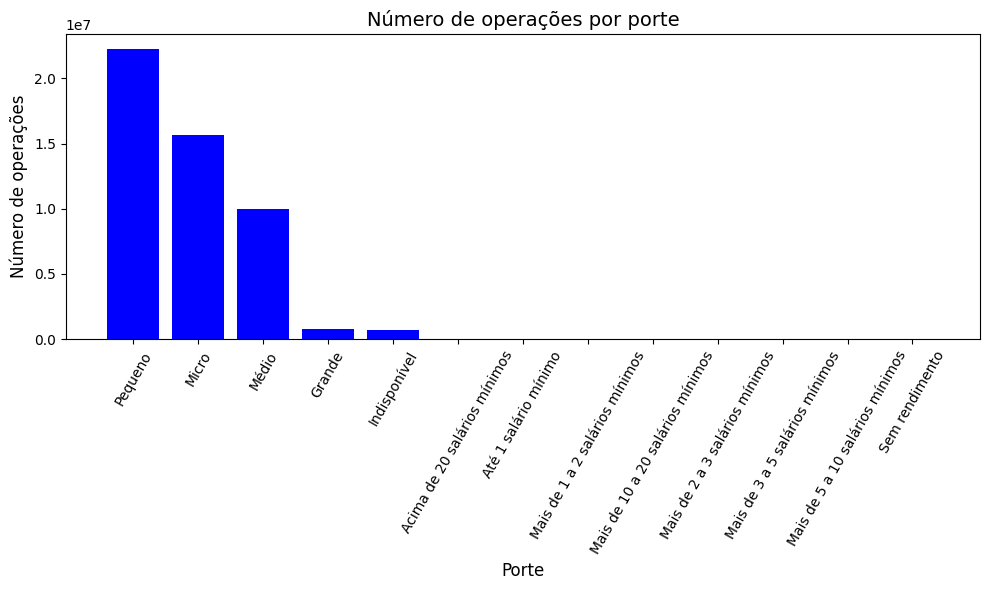

In [9]:
df_grouped = df.groupby('ct_porte')['nu_numero_de_operacoes'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='nu_numero_de_operacoes', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_porte'], df_grouped['nu_numero_de_operacoes'], color='blue')

plt.title('Número de operações por porte', fontsize=14)
plt.xlabel('Porte', fontsize=12)
plt.ylabel('Número de operações', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [10]:
df_grouped = df.groupby('ct_porte')['nu_numero_de_operacoes'].sum().reset_index()

print(df_grouped)

                            ct_porte  nu_numero_de_operacoes
0       Acima de 20 salários mínimos                       0
1               Até 1 salário mínimo                       0
2                             Grande                  804634
3                       Indisponível                  717924
4     Mais de 1 a 2 salários mínimos                       0
5   Mais de 10 a 20 salários mínimos                       0
6     Mais de 2 a 3 salários mínimos                       0
7     Mais de 3 a 5 salários mínimos                       0
8    Mais de 5 a 10 salários mínimos                       0
9                              Micro                15691973
10                             Médio                 9945060
11                           Pequeno                22266655
12                    Sem rendimento                       0


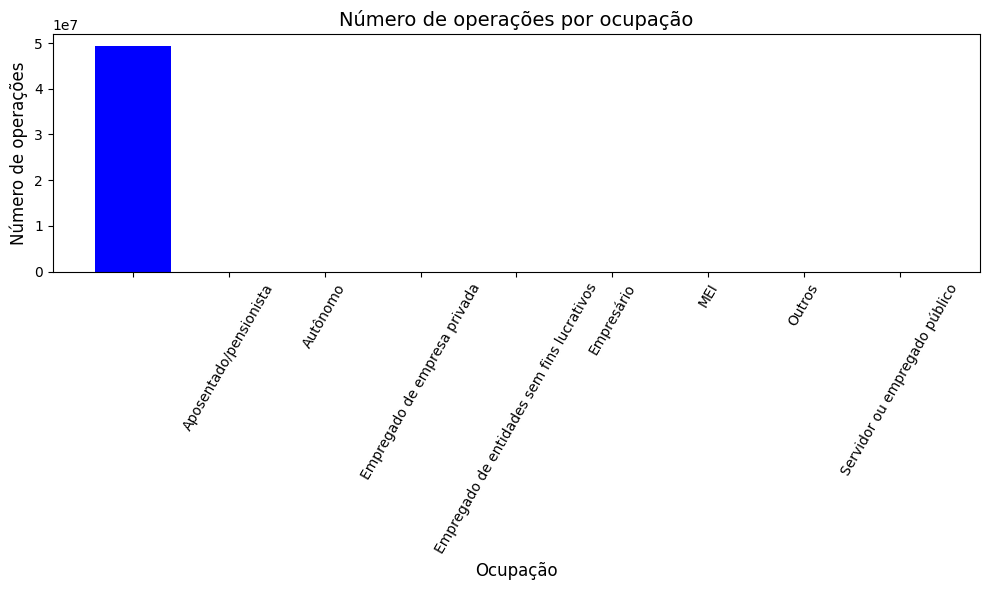

In [11]:
df_grouped = df.groupby('ct_ocupacao')['nu_numero_de_operacoes'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='nu_numero_de_operacoes', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_ocupacao'], df_grouped['nu_numero_de_operacoes'], color='blue')

plt.title('Número de operações por ocupação', fontsize=14)
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Número de operações', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [12]:
df_grouped = df.groupby('ct_ocupacao')['nu_numero_de_operacoes'].sum().reset_index()

print(df_grouped)

                                  ct_ocupacao  nu_numero_de_operacoes
0                                                            49426246
1                      Aposentado/pensionista                       0
2                                    Autônomo                       0
3                Empregado de empresa privada                       0
4  Empregado de entidades sem fins lucrativos                       0
5                                  Empresário                       0
6                                         MEI                       0
7                                      Outros                       0
8               Servidor ou empregado público                       0


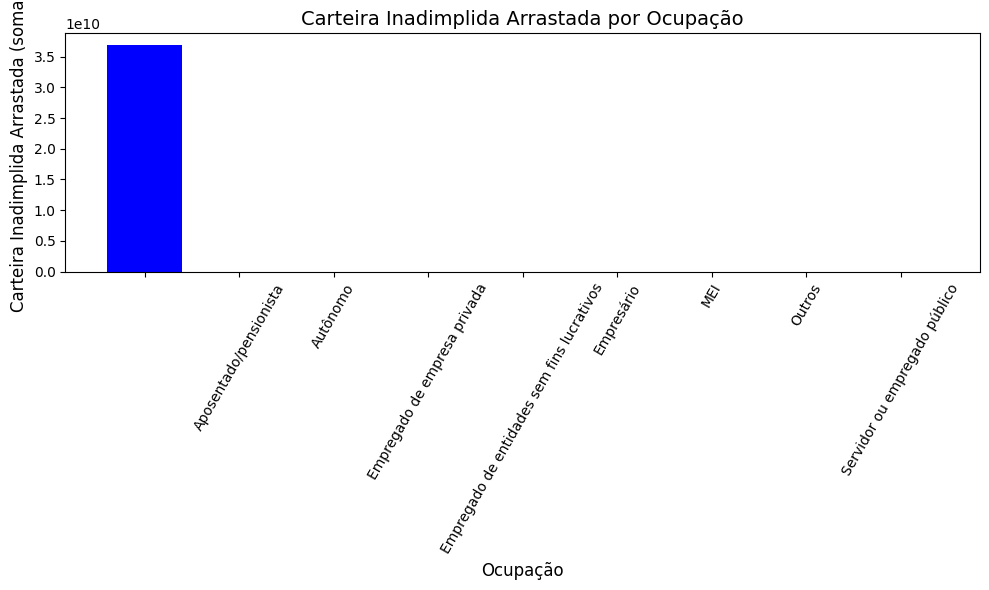

In [13]:
df_grouped = df.groupby('ct_ocupacao')['vl_carteira_inadimplida_arrastada'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='vl_carteira_inadimplida_arrastada', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ct_ocupacao'], df_grouped['vl_carteira_inadimplida_arrastada'], color='blue')

plt.title('Carteira Inadimplida Arrastada por Ocupação', fontsize=14)
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Carteira Inadimplida Arrastada (soma)', fontsize=12)

plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [14]:
df_grouped = df.groupby('ct_ocupacao')['vl_carteira_inadimplida_arrastada'].sum().reset_index()

print(df_grouped)

                                  ct_ocupacao  \
0                                               
1                      Aposentado/pensionista   
2                                    Autônomo   
3                Empregado de empresa privada   
4  Empregado de entidades sem fins lucrativos   
5                                  Empresário   
6                                         MEI   
7                                      Outros   
8               Servidor ou empregado público   

   vl_carteira_inadimplida_arrastada  
0                     36943664598.12  
1                               0.00  
2                               0.00  
3                               0.00  
4                               0.00  
5                               0.00  
6                               0.00  
7                               0.00  
8                               0.00  


### Análises Felipe (Label Temporária)

In [15]:
df = df[df['dt_data_base'] > pd.to_datetime('2013-01-01')]
df = df[df['dt_data_base'] < pd.to_datetime('2023-12-01')]

In [16]:
import pandas as pd

# Certifique-se de que a coluna 'dt_data_base' está no formato datetime
df['dt_data_base'] = pd.to_datetime(df['dt_data_base'])

# Extrair o ano da coluna 'dt_data_base'
df['Ano'] = df['dt_data_base'].dt.year

# Criar uma lista vazia para armazenar os resultados
resultados = []

# Definir o intervalo de anos que você quer processar (2013 até 2023)
anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Iterar sobre cada ano e acumular os valores
for ano in anos:
    # Filtrar o dataset para o ano específico
    df_ano_especifico = df[df['Ano'].astype(str) == ano]
    
    # Somar os valores desse ano, considerando que 'vl_carteira_inadimplida_arrastada' é a coluna relevante
    valor_acumulado = df_ano_especifico['vl_carteira_inadimplida_arrastada'].sum()
    
    # Armazenar o resultado no vetor (lista)
    resultados.append(valor_acumulado)

# Exibir o vetor com os resultados acumulados por ano
print(resultados)




[2574641426.31, 3481696368.47, 4608148429.219998, 4636613571.43, 4822675549.64, 3336955965.6, 2845841194.6200004, 2259040072.04, 1854468292.1299999, 1878566128.9699998, 2248139398.28]


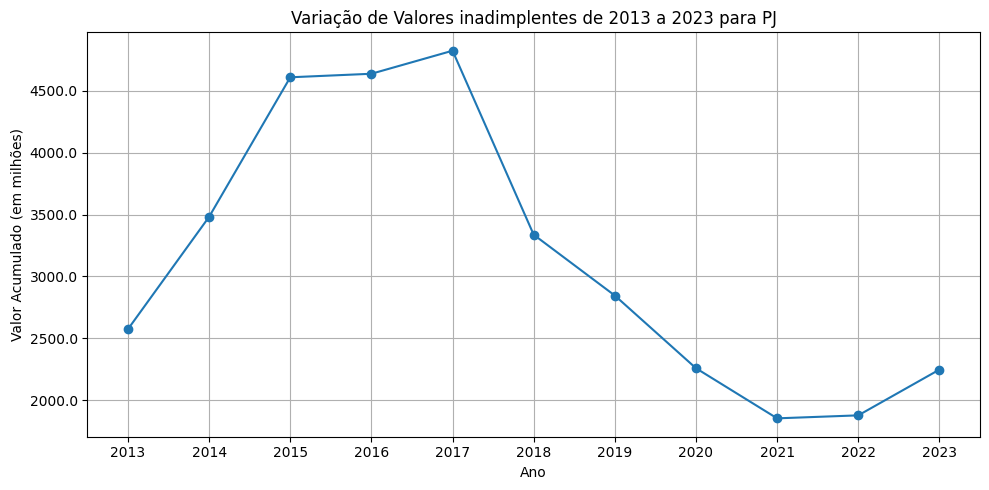

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Supondo que você já tenha o DataFrame 'df' e a lista 'resultados'

# Definir os anos como eixo X
anos = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(anos, resultados, marker='o')

# Função para formatar o eixo Y em milhões com uma casa decimal
def millions(x, pos):
    return f'{x * 1e-6:.1f}'  # Formatação em milhões com uma casa decimal

# Configurar o gráfico
plt.title('Variação de Valores inadimplentes de 2013 a 2023 para PJ')
plt.xlabel('Ano')
plt.ylabel('Valor Acumulado (em milhões)')
plt.grid(True)
plt.xticks(anos)  # Para garantir que todos os anos apareçam no eixo X

# Aplicar a formatação ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Mostrar o gráfico
plt.tight_layout()
plt.show()
